In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as nn



In [4]:
def get_model_info(model):
    # Calculate the total number of parameters
    total_params = sum(p.numel() for p in model.parameters())
    
    # Calculate the total size of the model in bytes
    total_size = sum(p.numel() * p.element_size() for p in model.parameters())

    # Convert total size to more readable units
    total_size_kb = total_size / 1024
    total_size_mb = total_size_kb / 1024
    total_size_gb = total_size_mb / 1024

    return {
        "total_params": total_params,
        "total_size_bytes": total_size,
        "total_size_kb": total_size_kb,
        "total_size_mb": total_size_mb,
        "total_size_gb": total_size_gb
    }


In [17]:
model_info = get_model_info(model)

print(f"Total Parameters: {model_info['total_params']}")
print(f"Total Size (bytes): {model_info['total_size_bytes']}")
print(f"Total Size (KB): {model_info['total_size_kb']:.2f}")
print(f"Total Size (MB): {model_info['total_size_mb']:.2f}")
print(f"Total Size (GB): {model_info['total_size_gb']:.6f}")

Total Parameters: 217437436
Total Size (bytes): 869749744
Total Size (KB): 849364.98
Total Size (MB): 829.46
Total Size (GB): 0.810018


In [39]:
# df = pd.read_csv('Extended_Survey_Responses.csv',encoding='utf-8')
df = pd.read_excel('(Ответы).xlsx')

In [40]:
df.head()

,Отметка времени,Оцените видео №1 [Общая оценка],Оцените видео №1 [Плавность],Оцените видео №1 [Связанность],Оцените видео №1 [Ритмичность],Оцените видео №2 [Общая оценка],Оцените видео №2 [Плавность],Оцените видео №2 [Связанность],Оцените видео №2 [Ритмичность],Оцените видео №3 [Общая оценка],Оцените видео №3 [Плавность],Оцените видео №3 [Связанность],Оцените видео №3 [Ритмичность]
0,2024-05-24 20:10:17.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-24 22:09:58.843,4.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,3.0,4.0
2,2024-05-24 22:11:33.056,5.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,4.0,3.0,3.0
3,2024-05-24 22:12:41.219,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,5.0,5.0,4.0,4.0
4,2024-05-24 22:13:34.875,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,2.0,2.0,3.0


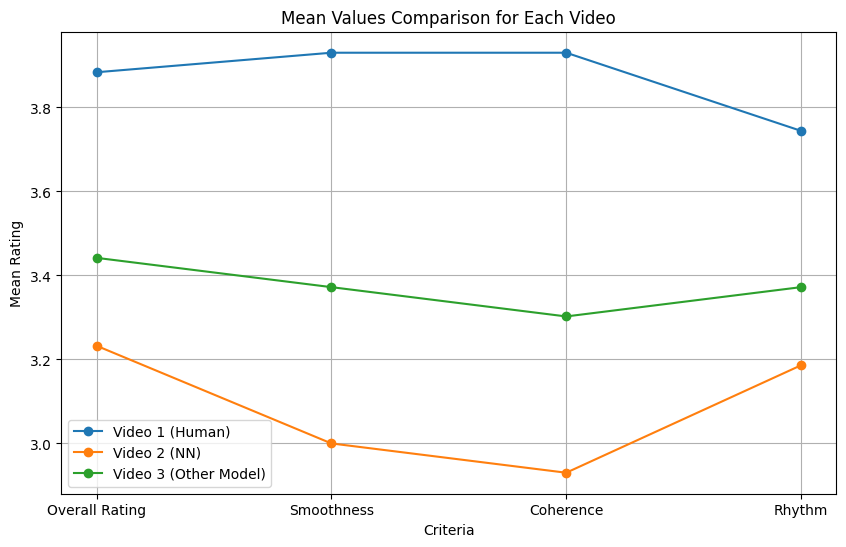

In [41]:

# Calculate mean values for each video across all criteria
mean_values = df.mean(numeric_only=True)

# Extract mean values for each video
mean_video1 = mean_values[['Оцените видео №1 [Общая оценка]', 'Оцените видео №1 [Плавность]', 'Оцените видео №1 [Связанность]', 'Оцените видео №1 [Ритмичность]']]
mean_video2 = mean_values[['Оцените видео №2 [Общая оценка]', 'Оцените видео №2 [Плавность]', 'Оцените видео №2 [Связанность]', 'Оцените видео №2 [Ритмичность]']]
mean_video3 = mean_values[['Оцените видео №3 [Общая оценка]', 'Оцените видео №3 [Плавность]', 'Оцените видео №3 [Связанность]', 'Оцените видео №3 [Ритмичность]']]

# Plot mean values for each video
plt.figure(figsize=(10, 6))

categories = ['Overall Rating', 'Smoothness', 'Coherence', 'Rhythm']

plt.plot(categories, mean_video1, marker='o', label='Video 1 (Human)')
plt.plot(categories, mean_video2, marker='o', label='Video 2 (NN)')
plt.plot(categories, mean_video3, marker='o', label='Video 3 (Other Model)')

plt.title('Mean Values Comparison for Each Video')
plt.xlabel('Criteria')
plt.ylabel('Mean Rating')
plt.legend()
plt.grid(True)
plt.show()

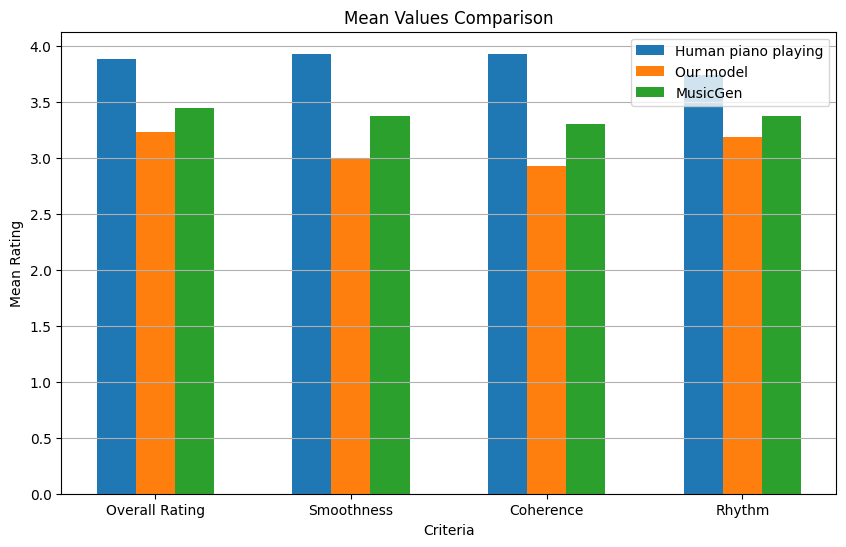

In [42]:
bar_width = 0.2
categories = ['Overall Rating', 'Smoothness', 'Coherence', 'Rhythm']
index = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width, mean_video1, bar_width, label='Human piano playing')
plt.bar(index, mean_video2, bar_width, label='Our model')
plt.bar(index + bar_width, mean_video3, bar_width, label='MusicGen')

plt.title('Mean Values Comparison')
plt.xlabel('Criteria')
plt.ylabel('Mean Rating')
plt.xticks(index, categories)
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [43]:
print(mean_video1)

Оцените видео №1 [Общая оценка]    3.883721
Оцените видео №1 [Плавность]       3.930233
Оцените видео №1 [Связанность]     3.930233
Оцените видео №1 [Ритмичность]     3.744186
dtype: float64


In [44]:
print(mean_video2)

Оцените видео №2 [Общая оценка]    3.232558
Оцените видео №2 [Плавность]       3.000000
Оцените видео №2 [Связанность]     2.930233
Оцените видео №2 [Ритмичность]     3.186047
dtype: float64


In [45]:
print(mean_video3)

Оцените видео №3 [Общая оценка]    3.441860
Оцените видео №3 [Плавность]       3.372093
Оцените видео №3 [Связанность]     3.302326
Оцените видео №3 [Ритмичность]     3.372093
dtype: float64
